In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt


# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = "./train",
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "./val",
    labels='inferred',
    label_mode = 'int',
    batch_size=16,
    image_size=(256,256)
)

# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax')) # using softmax activation for multiclass classification

# model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # using sparse_categorical_crossentropy, categorical_crossentropy for multiclass classification

# 0 for apple
# 1 for banana
# 2 for orange

history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Found 220 files belonging to 3 classes.
Found 55 files belonging to 3 classes.
Epoch 1/20
14/14 [==============================] - 22s 1s/step - loss: 8.4523 - accuracy: 0.6818 - val_loss: 3.6265 - val_accuracy: 0.3455
Epoch 2/20
14/14 [==============================] - 23s 2s/step - loss: 3.6735 - accuracy: 0.8955 - val_loss: 2.1653 - val_accuracy: 0.5636
Epoch 3/20
14/14 [==============================] - 24s 2s/step - loss: 2.1398 - accuracy: 0.9318 - val_loss: 2.8045 - val_accuracy: 0.6545
Epoch 4/20
14/14 [==============================] - 24s 2s/step - loss: 1.5717 - accuracy: 0.9545 - val_loss: 5.4753 - val_accuracy: 0.6000
Epoch 5/20
14/14 [==============================] - 24s 2s/step - loss: 2.4304 - accuracy: 0.9455 - val_loss: 4.1228 - val_accuracy: 0.7273
Epoch 6/20
14/14 [==============================] - 25s 2s/step - loss: 1.5414 - accuracy: 0.9591 - val_loss: 10.0337 - val_accuracy: 0.6182
Epoch 7/20
14/14 [==============================] - 25s 2s/step - loss: 0.7199 -

In [2]:
history = model.fit(train_ds, epochs=15, validation_data=validation_ds)

Epoch 1/15
14/14 [==============================] - 21s 1s/step - loss: 2.9406 - accuracy: 0.9818 - val_loss: 53.8013 - val_accuracy: 0.6909
Epoch 2/15
14/14 [==============================] - 24s 2s/step - loss: 0.6540 - accuracy: 0.9955 - val_loss: 30.0705 - val_accuracy: 0.7273
Epoch 3/15
14/14 [==============================] - 25s 2s/step - loss: 1.3546e-08 - accuracy: 1.0000 - val_loss: 14.3029 - val_accuracy: 0.8182
Epoch 4/15
14/14 [==============================] - 25s 2s/step - loss: 1.6429 - accuracy: 0.9818 - val_loss: 12.4042 - val_accuracy: 0.8364
Epoch 5/15
14/14 [==============================] - 25s 2s/step - loss: 0.1252 - accuracy: 0.9955 - val_loss: 16.0641 - val_accuracy: 0.8545
Epoch 6/15
14/14 [==============================] - 24s 2s/step - loss: 0.5604 - accuracy: 0.9909 - val_loss: 14.2210 - val_accuracy: 0.8182
Epoch 7/15
14/14 [==============================] - 24s 2s/step - loss: 0.9633 - accuracy: 0.9864 - val_loss: 12.7858 - val_accuracy: 0.9273
Epoch 8/1

In [3]:
# model.save('classification_fruits.h5')
# model = keras.models.load_model('classification_fruits.h5')

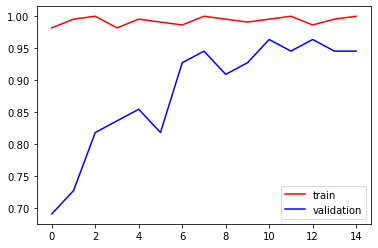

In [4]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

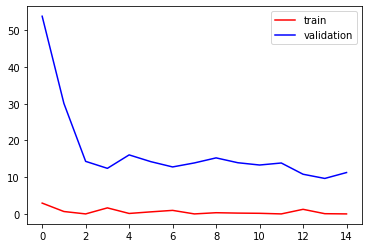

In [5]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

(1500, 1125)
1/1 [==============================] - 0s 50ms/step
2
[[0. 0. 1.]]


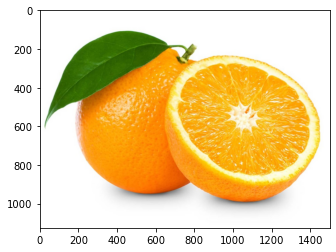

In [6]:
# load the image as a PIL Image object
img = Image.open("./val/Orange/orange_80.jpg")

plt.imshow(img)
print(img.size)

# # convert the image to RGB format
# img = img.convert('RGB')

# preprocess the image
img = img.resize((256, 256))  # resize the image to match the input size of the model
img = np.array(img) / 255.0  # convert the image to a numpy array and normalize its pixel values

# add a batch dimension to the input data
img = np.expand_dims(img, axis=0)

# use the model to make a prediction on the input data
results = model.predict(img)

# 0 for apple
# 1 for banana
# 2 for orange
print(results[0].argmax())

print(results)

In [7]:
img = cv2.imread("./val/Banana/banana_84.jpg")

print(img.shape)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img,(256,256))
img = img / 255.0 # normalize the pixel values
img = img.reshape((1,256,256,3))

# use the model to make a prediction on the input data
results = model.predict(img)

# 0 for apple
# 1 for banana
# 2 for orange
print(results[0].argmax())

print(results)

(366, 650, 3)
1/1 [==============================] - 0s 55ms/step
1
[[0. 1. 0.]]


In [8]:
type(results)

numpy.ndarray